> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.


### Question(s) for Analysis

> **Tip**: What factors are important for us to know in order to predict if a patient will show up for their scheduled
appointment?

In [139]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

## The Data Structure

#### Before working with the data I checked the database and found missing values, inconsistency or inadequate datatype. 
#### After getting more information and find out the questions I wanted to pose,
#### I cleaned the database. There were unecessary columns with missing data, inadequate datatypes. The columns 'genres' and 'production_companies' contained multiple values that doesn't meet the requirements of the normal form.



In [140]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [141]:
#Display the last five rows of the dataset
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [142]:
#Define numbers of Rows & column of dataset:
df.shape

(110527, 14)

In [143]:
#Define dataset types:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [144]:
#Display dataset columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [145]:
#Display the Unique value on database
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [146]:
#Display describtion database
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [147]:
#Define Nan values in dataset
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [148]:
# nice not found Nan Values .

In [149]:
#Define duplicate rows in dataset
sum(df.duplicated())

0

In [150]:
#Define duplicated values for patients in a column Patient Id
df['PatientId'].duplicated().sum()

48228

In [151]:
#Define unique values for patients in a column Patient Id
df['PatientId'].nunique()

62299

In [152]:
#Define unique values for patients in a column Patient Id & No_show

In [153]:
df.duplicated(['PatientId','No-show']).sum()

38710

In [154]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

### mens is 50% of femael

### The Data Structure

-Before working with the data I checked the database and found missing values, inconsistency or inadequate datatype. 
-After getting more information and find out the questions I wanted to pose,
-I cleaned the database. There were unecessary columns with missing data, inadequate datatypes. The columns '"PatientId" and 'ppointmentID' contained multiple values that doesn't meet the requirements of the normal form.


### The Cleaning Process

- I removed  the columns "PatientId","AppointmentID" overview and imdb id to improve database redability.         
- I dropped the Null value raws
- I Rename the column "Hipertension" to "Hypertension"  
- I Rename the column "No-show" to "N0_show"
- I creating mask to column "No_showe" 


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [155]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop_duplicates(inplace =True)
df.shape

(110527, 14)

In [156]:
df.drop(["PatientId","AppointmentID"],axis=1, inplace =True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


In [158]:
#dropping the null values
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(7), object(5)
memory usage: 11.0+ MB


### converted data type for ScheduledDay and AppointmentDay columns to datetime

In [159]:
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
df.AppointmentDay=pd.to_datetime(df.AppointmentDay.dt.strftime('%Y-%m-%d'))

df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.ScheduledDay=pd.to_datetime(df.ScheduledDay.dt.strftime('%Y-%m-%d'))

In [160]:
# Convert No-show to No_show .

df.rename(columns={'No-show':'No_show'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [161]:
#Correcting name column "Hipertension" to "Hypertension"   
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 11.0+ MB


In [162]:
# Creat mask to Rows Age
No_Age=df.query('Age=="-1"')
No_Age

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [163]:
df.drop(index=99832,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (How match Gender in no_show , showed ?)

In [164]:
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [165]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#  Creat mask to Rows no_show
showed=df[df.No_show=="No"]
No_show=df[df.No_show=="Yes"]

In [166]:
df.Gender.value_counts()

F    71839
M    38687
Name: Gender, dtype: int64

[Text(0.5,1,'Male and Female Percentage')]

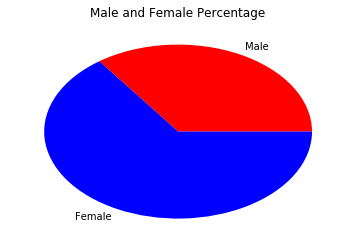

In [167]:
fig, ax = plt.subplots()
plt.pie([df.Gender[df.Gender=='M'].count(),df.Gender[df.Gender=='F'].count()], labels = ['Male','Female'],colors=['r','b'])
ax.set(title='Male and Female Percentage')


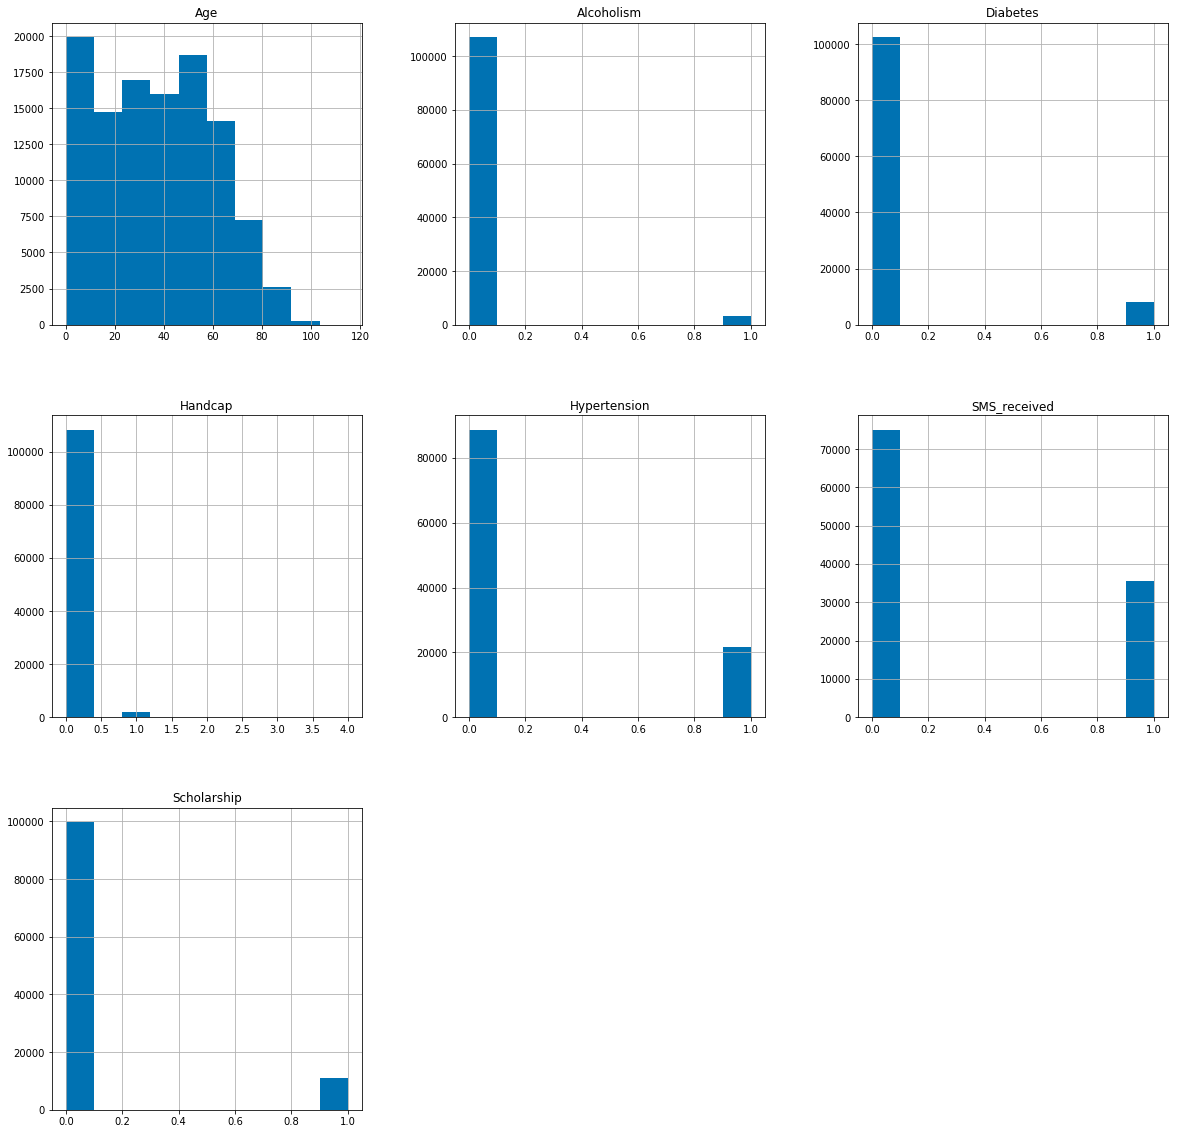

In [168]:
#histogram for all data :
df.hist(figsize=(20,20));

### Research Question 2  (Is there a relationship between Gender and No_show!)

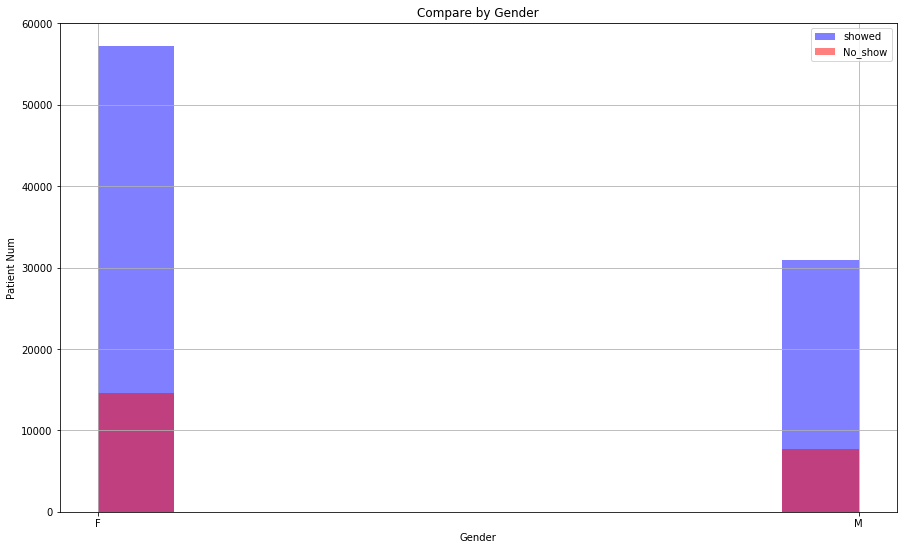

In [169]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=(15, 9))
showed.Gender.hist(alpha=0.5, color='blue', label='showed')
No_show.Gender.hist(alpha=0.5, color= 'red', label='No_show')
plt.legend()
plt.title('Compare by Gender')
plt.xlabel('Gender')
plt.ylabel('Patient Num');

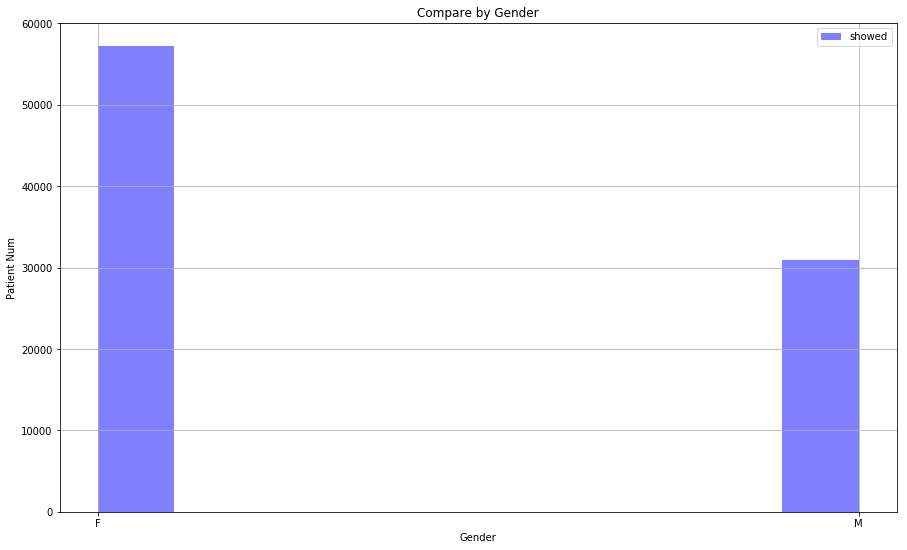

In [170]:
plt.figure(figsize=(15, 9))
showed.Gender.hist(alpha=0.5, color='blue', label='showed')
plt.legend()
plt.title('Compare by Gender')
plt.xlabel('Gender')
plt.ylabel('Patient Num');

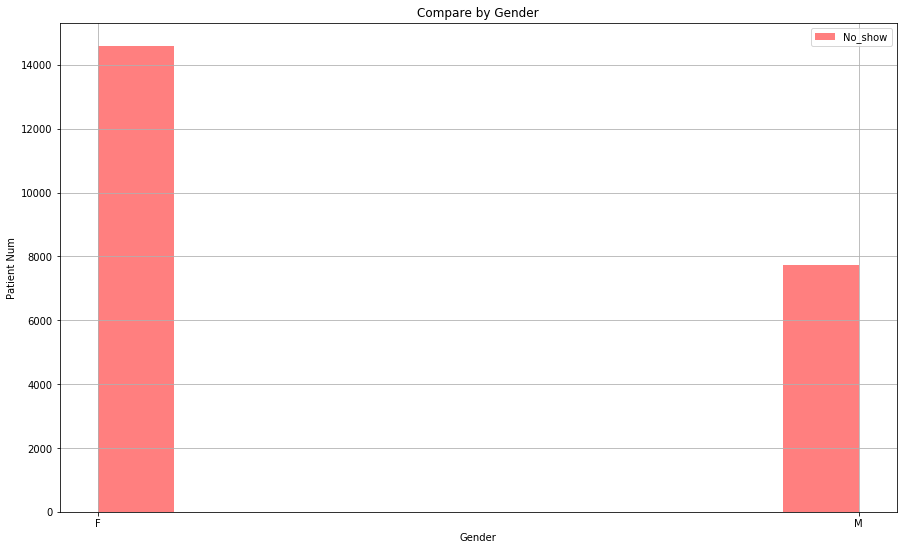

In [171]:
plt.figure(figsize=(15, 9))
No_show.Gender.hist(alpha=0.5, color= 'red', label='No_show')
plt.legend()
plt.title('Compare by Gender')
plt.xlabel('Gender')
plt.ylabel('Patient Num');

In [172]:
#The difference between appointment and attendance

In [173]:
df['delay']=(df.AppointmentDay - df.ScheduledDay).dt.days


In [174]:
df=df[df.delay>=0]

In [175]:
df.nunique()

Gender              2
ScheduledDay      111
AppointmentDay     27
Age               103
Neighbourhood      81
Scholarship         2
Hypertension        2
Diabetes            2
Alcoholism          2
Handcap             5
SMS_received        2
No_show             2
delay             129
dtype: int64

### Research Question 3  (Is there a relationship between Age and No_show!)

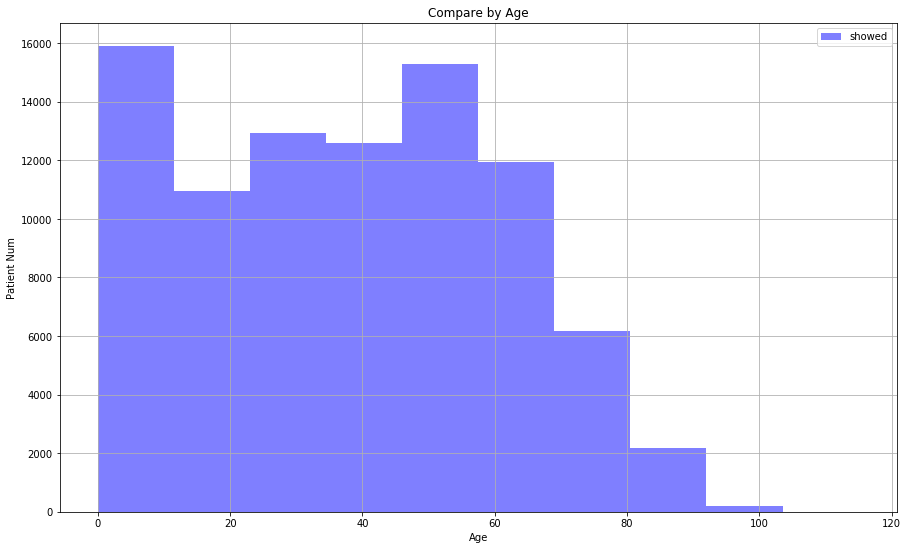

In [176]:
plt.figure(figsize=(15, 9))
showed.Age.hist(alpha=0.5, color='blue', label='showed')
plt.legend()
plt.title('Compare by Age')
plt.xlabel('Age')
plt.ylabel('Patient Num');

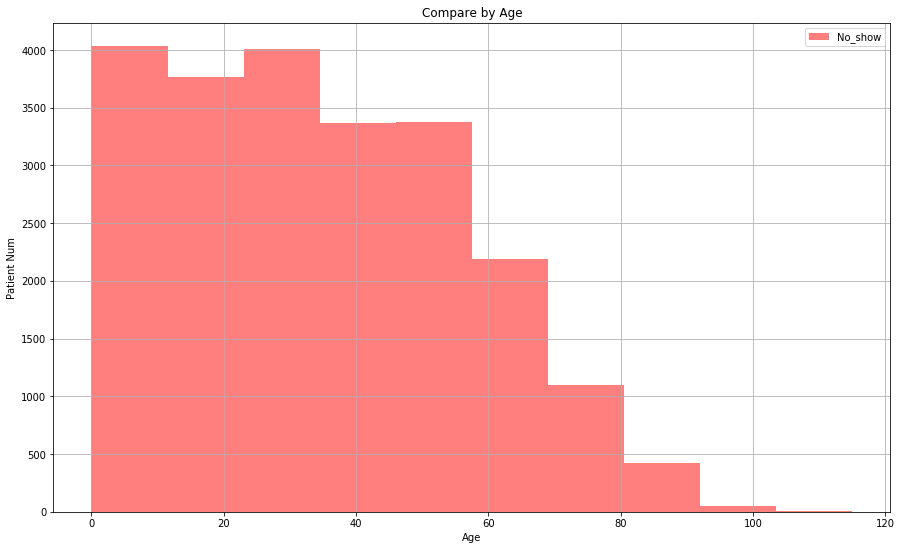

In [177]:
plt.figure(figsize=(15, 9))
No_show.Age.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by Age')
plt.xlabel('Age')
plt.ylabel('Patient Num');

### Research Question 4  (Is there a relationship between Neighourhood and No_show!)

In [ ]:
plt.figure(figsize=(15, 9))
showed.Neighbourhood.hist(alpha=0.5, color='blue', label='showed')
No_show.Neighbourhood.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by Neighbourhood')
plt.xlabel('Neighbourhood ')
plt.ylabel('Patient Num');

### Research Question 5  (Is there a relationship between Scholarship and No_show!)

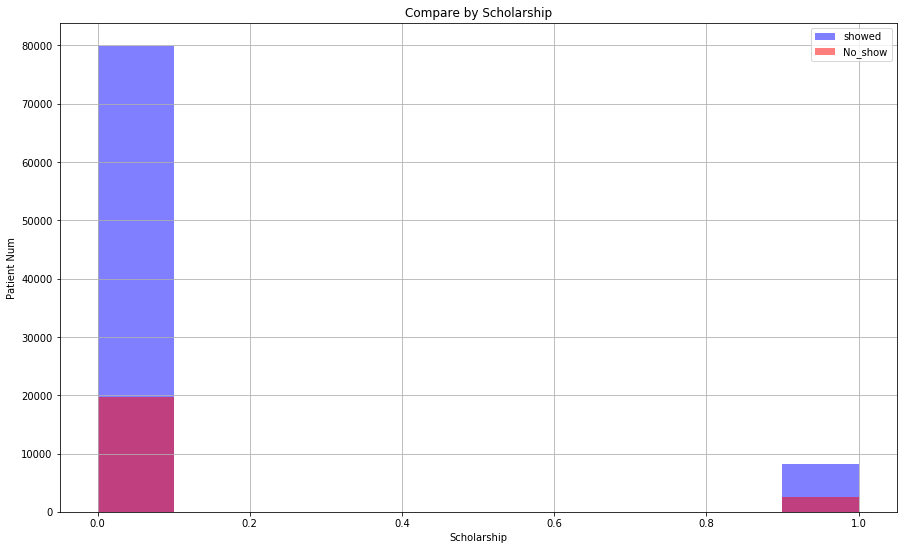

In [180]:
plt.figure(figsize=(15, 9))
showed.Scholarship.hist(alpha=0.5, color='blue', label='showed')
No_show.Scholarship.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Patient Num');

### Research Question 6  (Is there a relationship between Hypertension and No_show!)

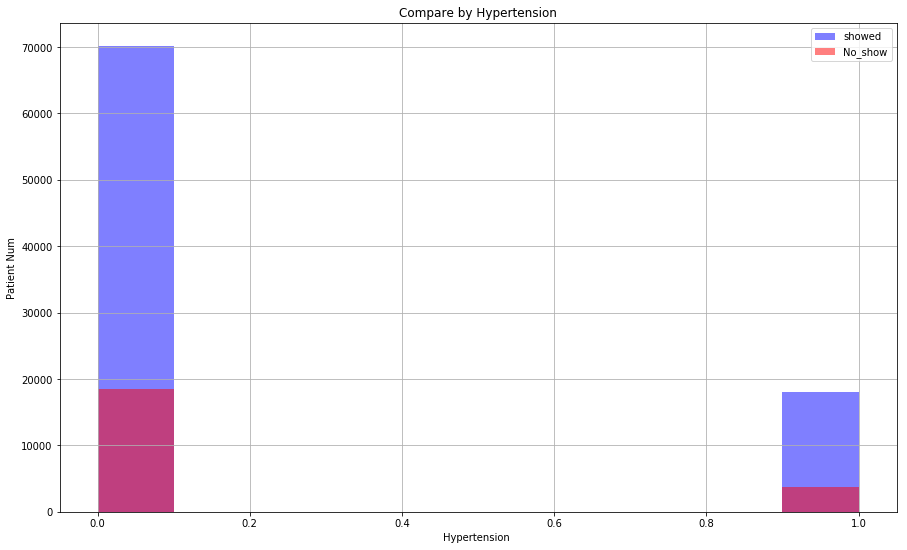

In [181]:
plt.figure(figsize=(15, 9))
showed.Hypertension.hist(alpha=0.5, color='blue', label='showed')
No_show.Hypertension.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by Hypertension')
plt.xlabel('Hypertension ')
plt.ylabel('Patient Num');

### Research Question 7  (Is there a relationship between Diabetes and No_show!)

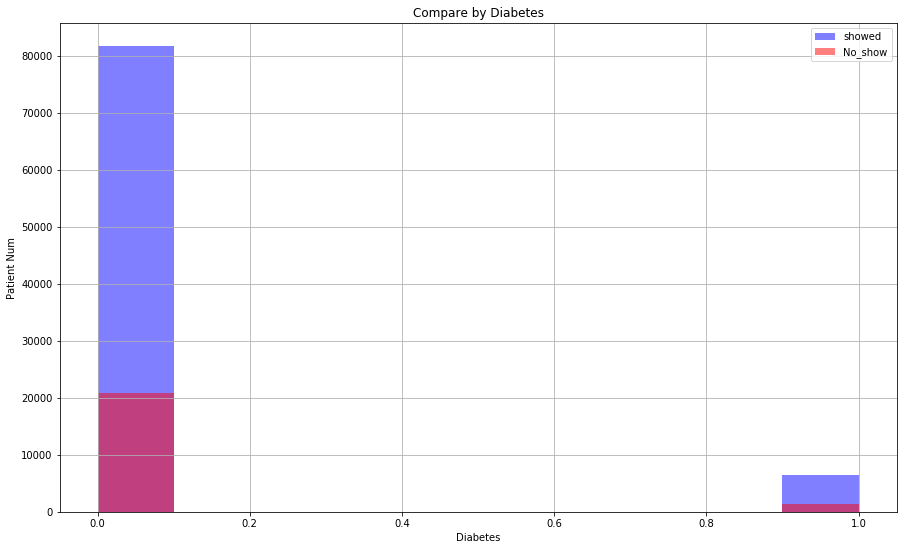

In [182]:
plt.figure(figsize=(15, 9))
showed.Diabetes.hist(alpha=0.5, color='blue', label='showed')
No_show.Diabetes.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Patient Num');

### Research Question 8  (Is there a relationship between Alcoholism and No_show!)

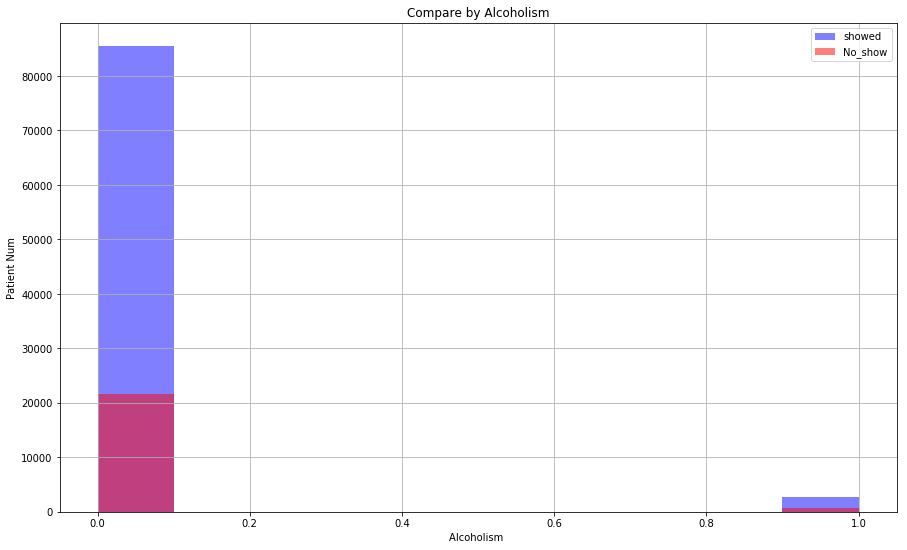

In [183]:
plt.figure(figsize=(15, 9))
showed.Alcoholism.hist(alpha=0.5, color='blue', label='showed')
No_show.Alcoholism.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by Alcoholism')
plt.xlabel('Alcoholism ')
plt.ylabel('Patient Num');

### Research Question 9  (Is there a relationship between Handcap and No_show!)

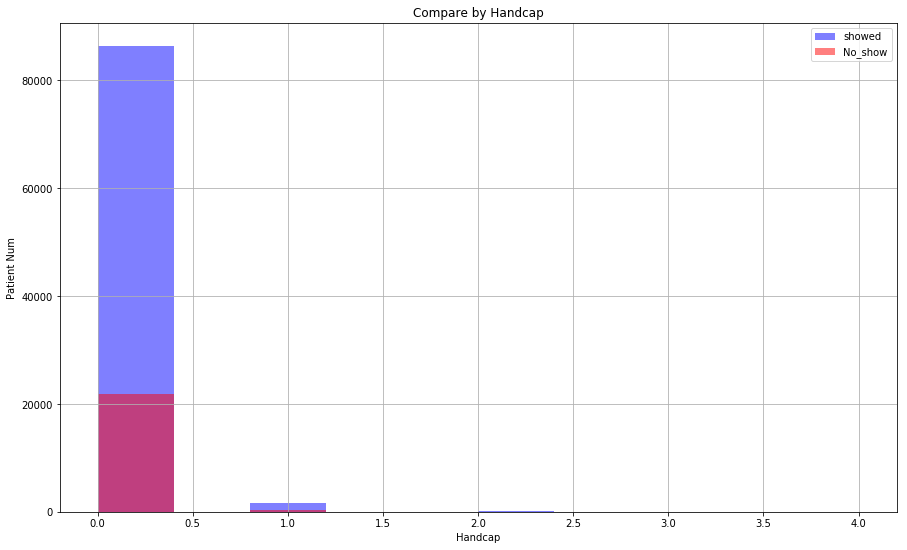

In [184]:
plt.figure(figsize=(15, 9))
showed.Handcap.hist(alpha=0.5, color='blue', label='showed')
No_show.Handcap.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by Handcap')
plt.xlabel('Handcap')
plt.ylabel('Patient Num');

### Research Question 10  (Is there a relationship between SMS_received and No_show!)

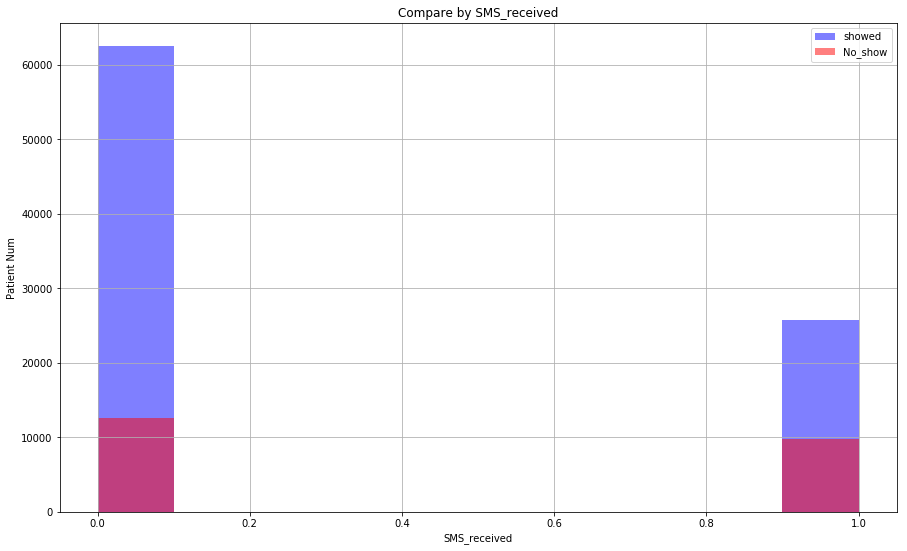

In [185]:
plt.figure(figsize=(15, 9))
showed.SMS_received.hist(alpha=0.5, color='blue', label='showed')
No_show.SMS_received.hist(alpha=0.5,color='red',label='No_show')
plt.legend()
plt.title('Compare by SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('Patient Num');

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.


> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you #avoid implying causation from correlation!
#Patients' ages ranged from 18 to 55
#About 25% of patients who received repeat confirmation letters
#The impact of chronic diseases such as diabetes and stress, as well as alcohol abuse, as well as for people with #disabilities, is not clear
#The effect of those with health insurance is unclear
#The effect of proximity to clinics is not great, the effect is simple
#You notice the effect of age clearly, as the younger age groups are more likely to go, and this is due to the parents’ interest in their children over the older age groups, which is a very small percentage.

#I also noticed that the largest percentage of patients in attendance did not see the appointment confirmation message, and they also attended on the day of booking, meaning that they attended and were presented to the doctor on the same day.

### All in all, there is no clear cause

### Limitations
> **Tip**: I feel there are no restrictions in the input dataset, you can also state that there are no restrictions in this project.
Except for some minor and non-affecting observations on the data
#- There is one record with a negative age, and this was illogical, and I deleted this record, as it does not actually affect the data.
#- Repeating the booking date for the same people and you also excluded them.
#- No blank records and that was good


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [187]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255